# Predicting car prices 
---
The dataset comes from the UCI Machine Learning Repository and can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

## Information on the dataset
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. 

Note: Several of the attributes in the database could be used as a "class" attribute.


## Attribute information
1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

## Data import & pre-processing

In [43]:
import pandas as pd

columns = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

cars = pd.read_csv('imports-85.data', names=columns, na_values='?')

In [44]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [45]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

Let's count null values:

In [46]:
cars.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Since we have a lot of rows with null values in column 'normalized_losses', let's replace the null values for this column by the mean:

In [47]:
cars['normalized_losses'].fillna(cars['normalized_losses'].mean(), inplace=True)

In [48]:
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

Let's drop the remaining null values:

In [49]:
cars.dropna(inplace=True)

We verify:

In [50]:
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [51]:
cars = cars.reset_index(drop=True)

In [52]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 26 columns):
symboling            193 non-null int64
normalized_losses    193 non-null float64
make                 193 non-null object
fuel_type            193 non-null object
aspiration           193 non-null object
num_doors            193 non-null object
body_style           193 non-null object
drive_wheels         193 non-null object
engine_location      193 non-null object
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null int64
engine_type          193 non-null object
num_cylinders        193 non-null object
engine_size          193 non-null int64
fuel_system          193 non-null object
bore                 193 non-null float64
stroke               193 non-null float64
compression_ratio    193 non-null float64
horsepower           193 non-

## Feature selection

We only keep numeric columns:

In [57]:
numcols = [each for each in cars.columns if cars[each].dtype != 'object']

In [58]:
cars_num = cars[numcols].copy()
cars_num = cars_num.astype('float')

In [59]:
cars_num.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


We don't keep sympboling because not continous:

In [60]:
cars_num = cars_num.drop('symboling', axis=1)

In [61]:
cars_num.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


## Target variable
'price' is the target column:

In [62]:
y = cars_num['price']
X = cars_num.drop('price', axis=1)

## Data normalization

We normalize the data so that all values range from 0 to 1.

In [63]:
X = (X - X.min())/(X.max() - X.min())

In [64]:
X.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895


## Univariate k-nearest neighbors model
We start with simple models before moving to more complex models to helps us structure our code workflow and understand the features better.

In [174]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(columns,X,y,k=5,s=0.5):
    # We randomize the rows in the dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(X.index)
    X = X.reindex(shuffled_index)
    y = y.reindex(shuffled_index)
    # Split into train/test sets according to s
    X = X[columns]
    maxrow = int(X.shape[0] * s)
    X_train = X[:maxrow]
    y_train = y[:maxrow]
    X_test = X[maxrow:]
    y_test = y[maxrow:]
    # We instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k)
    # We fit the model on the training set
    knn.fit(X_train, y_train)
    # We make predictions on the test set
    y_pred = knn.predict(X_test)
    # We compute the RMSE and return it
    rmse = (mean_squared_error(y_test, y_pred)) ** .5
    return rmse

In [175]:
rmses = pd.DataFrame(columns=['RMSE'],index=X.columns)
for each in X.columns:
    rmses['RMSE'][each] = knn_train_test([each],X,y)

rmses_sorted = rmses.sort_values(by='RMSE')
rmses_sorted

,RMSE
engine_size,3247.86
curb_weight,4277.09
city_mpg,4453.4
highway_mpg,4457.95
width,4586.63
horsepower,4928.54
length,5823.22
wheel_base,5879.63
compression_ratio,6654.97
bore,7204


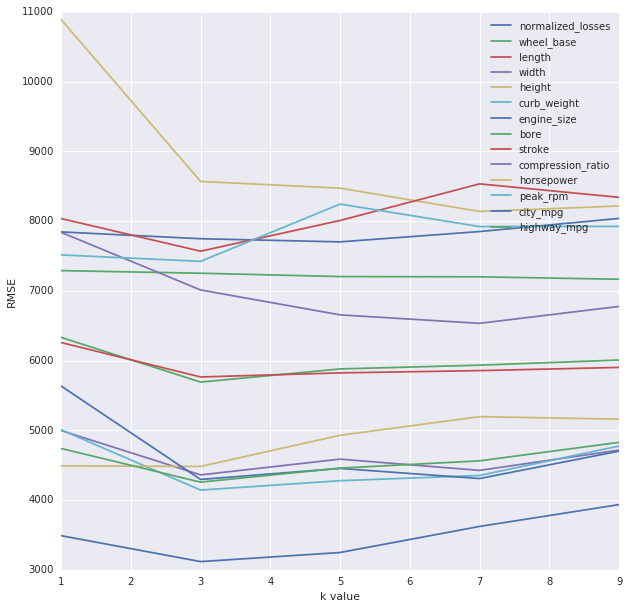

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Let's compare the results varying the number of neighbors
ks = [1,3,5,7,9]

plt.figure(figsize=(10,10))

for each in X.columns:
    rmses = []
    for k in ks:
        rmses.append(knn_train_test([each],X,y,k))
    plt.plot(ks,rmses,label=each)

plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()
plt.show()

As we can see, given a univariate model, the best results are obtained for k=3 and column 'engine_size'.  Let's plot a heat map of the data:

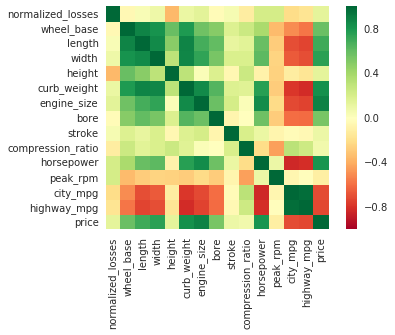

In [168]:
df = X.copy()
df['price'] = y
df.head()

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

We see that colum 'engine_size' is the most positively correlated with the 'price' column.

## Multivariate model
### All features

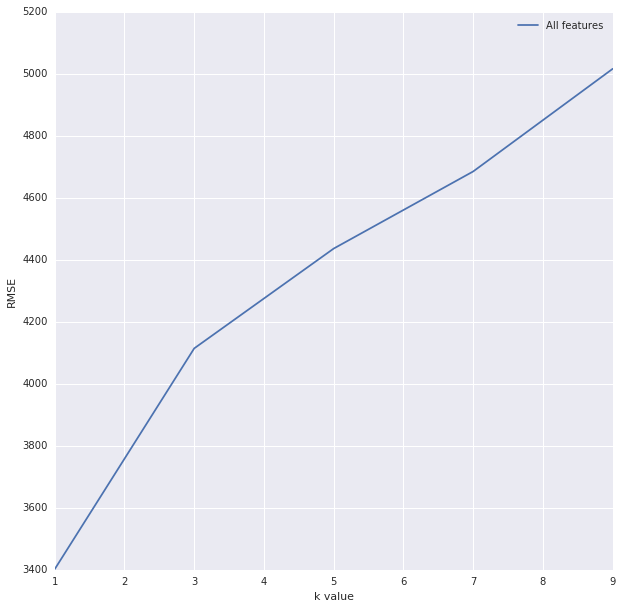

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Let's compare the results varying the number of neighbors
ks = [1,3,5,7,9]

plt.figure(figsize=(10,10))

rmses = []
for k in ks:
    rmses.append(knn_train_test(X.columns,X,y,k))
plt.plot(ks,rmses,label='All features')

plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()
plt.show()

It seems the best result is obtained for k=1!

### Best 2, 3, 4 and 5 features together + hyperparameter optimization
For each case, we will so some hyperparameter optimization by varying the number of neighbors from 1 to 25.

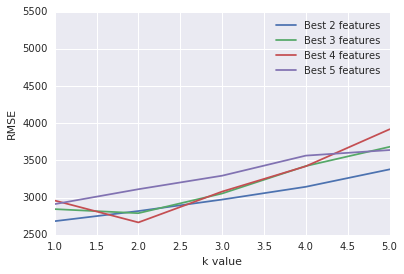

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Let's compare the results varying the number of neighbors
ks = range(1,25)

for best_f in [2,3,4,5]:
    rmses = []
    for k in ks:
        rmses.append(knn_train_test(list(rmses_sorted.index)[:best_f],X,y,k))
    bf_label = 'Best '+ str(best_f) + ' features'
    plt.plot(ks,rmses,label=bf_label)

plt.xlim(1,5)
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()
plt.show()

We see that the best results are obtained for k=2 and the best 4 features.